In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [26]:
data = pd.read_csv('stocks.csv') 


In [27]:
data['Date'] = pd.to_datetime(data['Date'])


In [28]:
data.sort_values(by='Date', inplace=True)


In [29]:
print(data.head(5))

    Ticker       Date        Open        High         Low       Close  \
0     AAPL 2023-02-07  150.639999  155.229996  150.639999  154.649994   
62    MSFT 2023-02-07  260.529999  268.769989  260.079987  267.559998   
186   GOOG 2023-02-07  103.629997  108.669998  103.547997  108.040001   
124   NFLX 2023-02-07  358.510010  364.179993  354.179993  362.950012   
187   GOOG 2023-02-08  102.690002  103.580002   98.455002  100.000000   

      Adj Close    Volume  
0    154.414230  83322600  
62   266.891510  50841400  
186  108.040001  33738800  
124  362.950012   6289400  
187  100.000000  73546000  


In [30]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 17.4+ KB
None


In [31]:
print(data.describe())

                                Date        Open        High         Low  \
count                            248  248.000000  248.000000  248.000000   
mean   2023-03-22 22:27:05.806451712  215.252093  217.919662  212.697452   
min              2023-02-07 00:00:00   89.540001   90.129997   88.860001   
25%              2023-03-01 00:00:00  135.235004  137.440004  134.822495   
50%              2023-03-22 12:00:00  208.764999  212.614998  208.184998   
75%              2023-04-14 00:00:00  304.177505  307.565002  295.437500   
max              2023-05-05 00:00:00  372.410004  373.829987  361.739990   
std                              NaN   91.691315   92.863023   90.147881   

            Close   Adj Close        Volume  
count  248.000000  248.000000  2.480000e+02  
mean   215.381674  215.362697  3.208210e+07  
min     89.349998   89.349998  2.657900e+06  
25%    136.347498  136.347498  1.714180e+07  
50%    209.920006  209.920006  2.734000e+07  
75%    303.942505  303.942505  4.771772

In [32]:
print(data.dtypes)

Ticker               object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [33]:
print(data['Ticker'].unique())

['AAPL' 'MSFT' 'GOOG' 'NFLX']


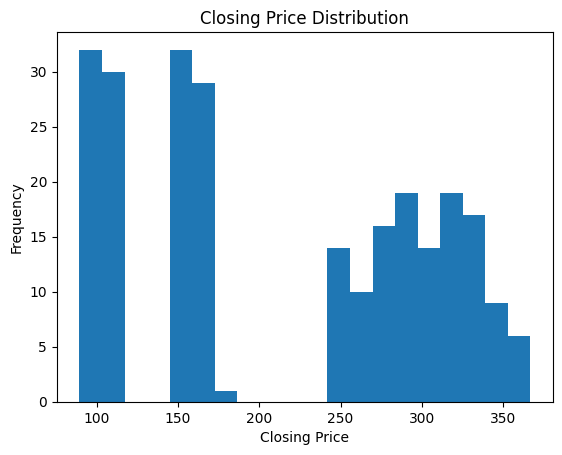

In [34]:
plt.hist(data['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Closing Price Distribution')
plt.show()

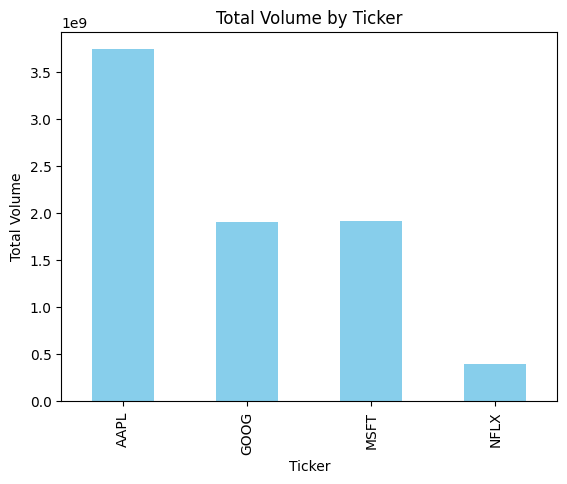

In [35]:
ticker_volume = data.groupby('Ticker')['Volume'].sum()
ticker_volume.plot(kind='bar' ,color='skyblue')
plt.title('Total Volume by Ticker')
plt.ylabel('Total Volume')
plt.show()


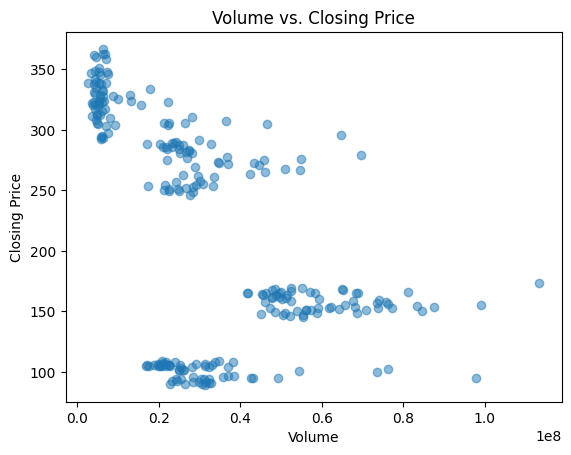

In [36]:
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs. Closing Price')
plt.show()

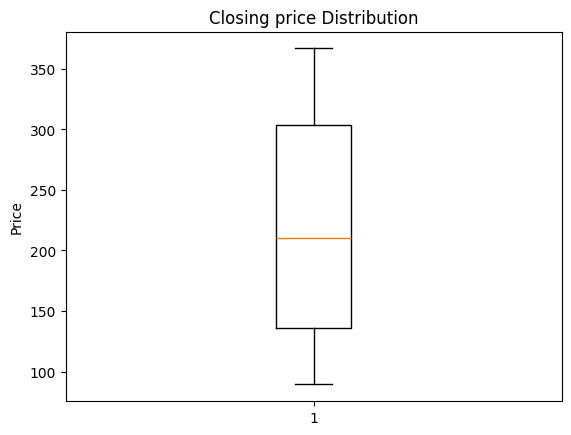

In [37]:
plt.boxplot(data['Close'])
plt.title('Closing price Distribution')
plt.ylabel('Price')
plt.show()

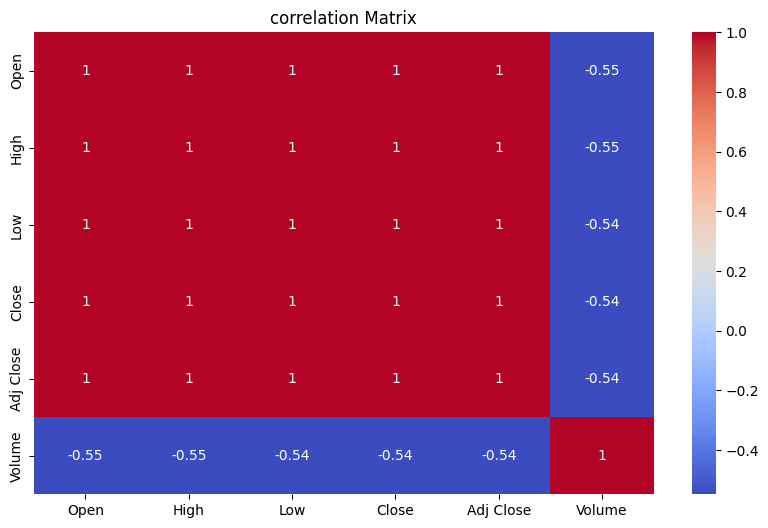

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('correlation Matrix')
plt.show()

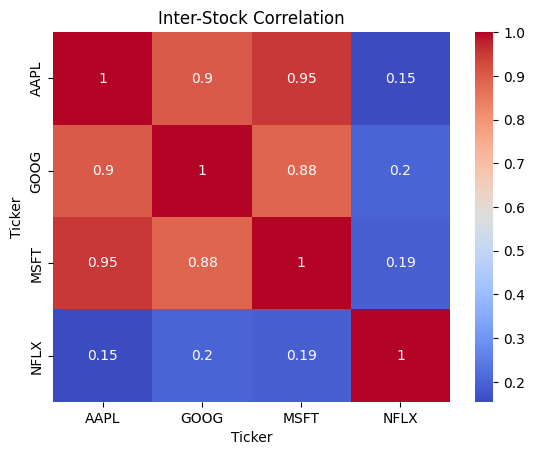

In [39]:
pivot_df = data.pivot(index='Date', columns='Ticker', values='Close')
sns.heatmap(pivot_df.corr(), annot=True, cmap='coolwarm')
plt.title("Inter-Stock Correlation")
plt.show()


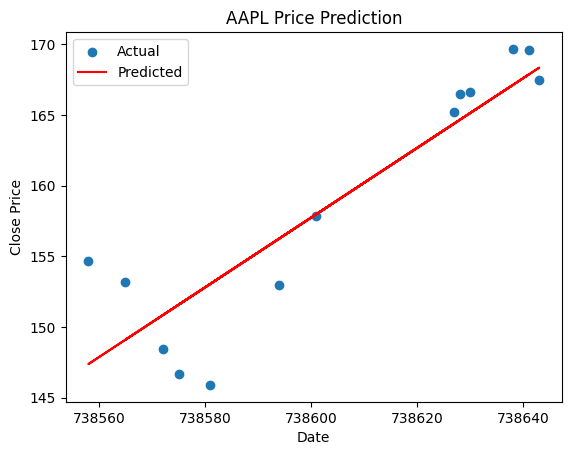

In [40]:
aapl = data[data['Ticker'] == 'AAPL'].copy()
aapl['Date_ordinal'] = aapl['Date'].map(pd.Timestamp.toordinal)

X = aapl[['Date_ordinal']]
y = aapl['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, predictions, color='red', label='Predicted')
plt.title('AAPL Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [41]:
print("R² Score:", r2_score(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))


R² Score: 0.817973190641038
RMSE: 3.6920269096166636
